<a href="https://colab.research.google.com/github/Hanzgio/Coder_DataScience/blob/main/Hanz_Herrada_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Subimos los archivos del dataset ContosoSales 
from google.colab import files
 
 
uploaded = files.upload()

Saving Calendar.csv to Calendar.csv
Saving Channel.csv to Channel.csv
Saving FactSales.csv to FactSales.csv
Saving Geography.csv to Geography.csv
Saving Product.csv to Product.csv
Saving ProductCategory.csv to ProductCategory.csv
Saving ProductSubcategory.csv to ProductSubcategory.csv
Saving Promotion.csv to Promotion.csv
Saving Stores.csv to Stores.csv


In [136]:
import pandas as pd

# Cargar las tablas de Contoso Sales
fact_sales = pd.read_csv('FactSales.csv')
channel = pd.read_csv('Channel.csv')
product = pd.read_csv('Product.csv', encoding='Windows-1252')
promotion = pd.read_csv('Promotion.csv')
stores = pd.read_csv('Stores.csv')
geography = pd.read_csv('Geography.csv')
productsubcategory = pd.read_csv('ProductSubcategory.csv')
productcategory = pd.read_csv('ProductCategory.csv')
calendar = pd.read_csv('Calendar.csv', encoding='Windows-1252')

In [137]:
# Revisaremos todas las columnas del dataset, para despues poder unir las tablas
print(fact_sales.columns)

Index(['OrderID', 'DateKey', 'ChannelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'SalesQuantity', 'ReturnQuantity'],
      dtype='object')


In [ ]:
print(channel.columns)

Index(['ChannelKey', 'ChannelName'], dtype='object')


In [ ]:
print(product.columns)

Index(['ProductKey', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'ColorID', 'ColorName', 'Size', 'Weight', 'UnitCost',
       'UnitPrice'],
      dtype='object')


In [173]:
print(promotion.columns)

Index(['PromotionKey', 'PromotionLabel', 'PromotionName', 'DiscountPercent',
       'StartDate', 'EndDate'],
      dtype='object')


In [ ]:
print(stores.columns)

Index(['StoreKey', 'GeographyKey', 'StoreType', 'StoreName', 'EmployeeCount',
       'SellingAreaSize'],
      dtype='object')


In [ ]:
print(product.columns)

Index(['ProductKey', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'ColorID', 'ColorName', 'Size', 'Weight', 'UnitCost',
       'UnitPrice'],
      dtype='object')


In [ ]:
print(geography.columns)

Index(['GeographyKey', 'ContinentName', 'RegionCountryName'], dtype='object')


In [ ]:
print(productsubcategory.columns)

Index(['ProductSubcategoryKey', 'ProductSubcategoryName',
       'ProductCategoryKey'],
      dtype='object')


In [ ]:
print(productcategory.columns)

Index(['ProductCategoryKey', 'ProductCategory'], dtype='object')


In [ ]:
print(calendar.columns)

Index(['DateKey', 'Año', 'Mes', 'Nombre Mes', 'Dia', 'Dia Semana Numero',
       'Dia Semana', 'Semestre', 'Cuatrimestre', 'Trimestre', 'Bimestre',
       'Semana', 'Semana W', 'Semana ISO', 'Semana ISO W'],
      dtype='object')


In [138]:
# Haremos el primer merge antes de agregar todas las columnas a fact_sales
productsubcategory = pd.merge(productcategory, productsubcategory, on='ProductCategoryKey')

In [139]:
# Haremos el tercer merge donde agregaremos todas las columnas a fact_sales
stores = pd.merge(stores, geography, on='GeographyKey')
product = pd.merge(product, productsubcategory, on='ProductSubcategoryKey')

In [140]:
# Haremos el tercer merge donde agregaremos todas las columnas a fact_sales
fact_sales = pd.merge(fact_sales, channel, on='ChannelKey')
fact_sales = pd.merge(fact_sales, calendar, on='DateKey')
fact_sales = pd.merge(fact_sales, promotion, on='PromotionKey')
fact_sales = pd.merge(fact_sales, stores, on='StoreKey')
fact_sales = pd.merge(fact_sales, product, on='ProductKey')

In [141]:
# Validamos que en la tabla de fact_sales ya se encuentren todas las columnas del dataset.
print(fact_sales.columns)

Index(['OrderID', 'DateKey', 'ChannelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'SalesQuantity', 'ReturnQuantity', 'ChannelName', 'Año',
       'Mes', 'Nombre Mes', 'Dia', 'Dia Semana Numero', 'Dia Semana',
       'Semestre', 'Cuatrimestre', 'Trimestre', 'Bimestre', 'Semana',
       'Semana W', 'Semana ISO', 'Semana ISO W', 'PromotionLabel',
       'PromotionName', 'DiscountPercent', 'StartDate', 'EndDate',
       'GeographyKey', 'StoreType', 'StoreName', 'EmployeeCount',
       'SellingAreaSize', 'ContinentName', 'RegionCountryName', 'ProductName',
       'ProductDescription', 'ProductSubcategoryKey', 'Manufacturer',
       'BrandName', 'ClassID', 'ClassName', 'ColorID', 'ColorName', 'Size',
       'Weight', 'UnitCost', 'UnitPrice', 'ProductCategoryKey',
       'ProductCategory', 'ProductSubcategoryName'],
      dtype='object')


In [142]:
# Convertimos fact_sales en nuestro data = df
data = df = fact_sales

In [143]:
# Revisamos nuestra data
data

,OrderID,DateKey,ChannelKey,StoreKey,ProductKey,PromotionKey,SalesQuantity,ReturnQuantity,ChannelName,Año,...,ClassName,ColorID,ColorName,Size,Weight,UnitCost,UnitPrice,ProductCategoryKey,ProductCategory,ProductSubcategoryName
0,7077,13/04/2008,1,297,1086,17,9,1,Store,2008,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
1,1557894,13/11/2007,1,297,1086,10,6,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
2,1223944,16/08/2007,1,244,1086,9,4,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
3,339027,09/06/2007,1,243,1086,1,5,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
4,737946,15/05/2007,1,206,1086,1,5,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1222708,05/06/2009,1,262,1399,25,12,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048571,591684,14/11/2009,1,273,1399,23,13,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048572,848801,18/09/2009,1,271,1399,1,10,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048573,1357698,24/11/2009,1,271,1399,23,13,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones


In [144]:
# Importaremos las librerías que necesitaresmos para realizar los análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

# **HIPOTESIS**

Con el presente analisis se buscara responder 3 grupos de hipotesis distribuidas de la siguiente manera:


***Grupo 1: Canales de venta***

1.   El canal de venta online tendrán un mayor número de ventas que los canales físicos.
2.   Los canales de venta más utilizados son aquellos que ofrecen mayores descuentos.
3.   Las ventas a través de canales físicos tienen una mayor tasa de devolución que las ventas en línea.

***Grupo 2: Productos***

4.   La categoría de celulares es la que más se han vendido.
5.   Los productos con promociones especiales tienen una tasa de devolución más alta que los productos sin promociones.
6.   La demanda de computadoras varía según la temporada del año.

***Grupo 3: Promociones***

7.   Las promociones que tienen una duración más larga generan más ventas que las promociones de corta duración.
8.   Las promociones en audio tienen un mayor impacto en las ventas totales que en otros productos.
9.   Las promociones tienen un mayor impacto en la cantidad de devoluciones de productos que las ventas regulares.


# Grupo 1: Canales de venta


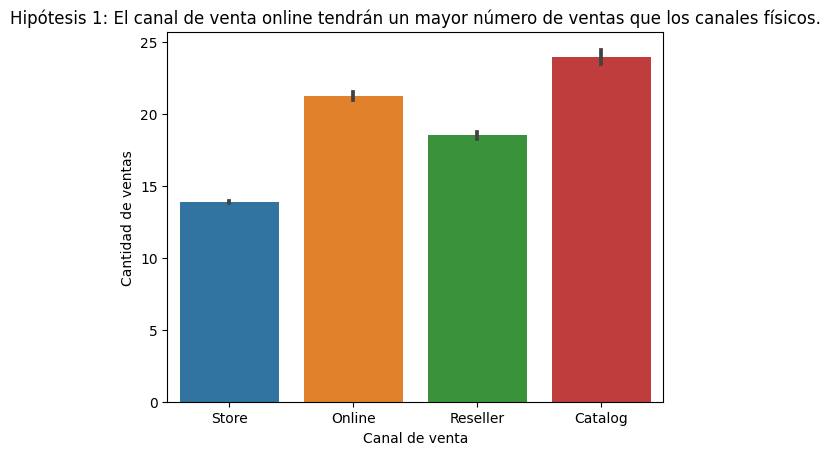

In [145]:
sns.barplot(x="ChannelName", y="SalesQuantity", data=df)
plt.title("Hipótesis 1: El canal de venta online tendrán un mayor número de ventas que los canales físicos.")
plt.xlabel('Canal de venta')
plt.ylabel('Cantidad de ventas')
plt.show()

Con esta grafica podemos inferir que nuestra primer hipotesis es **falsa**, ya que venta por catalogo es el canal que tiene el mayor número de ventas.

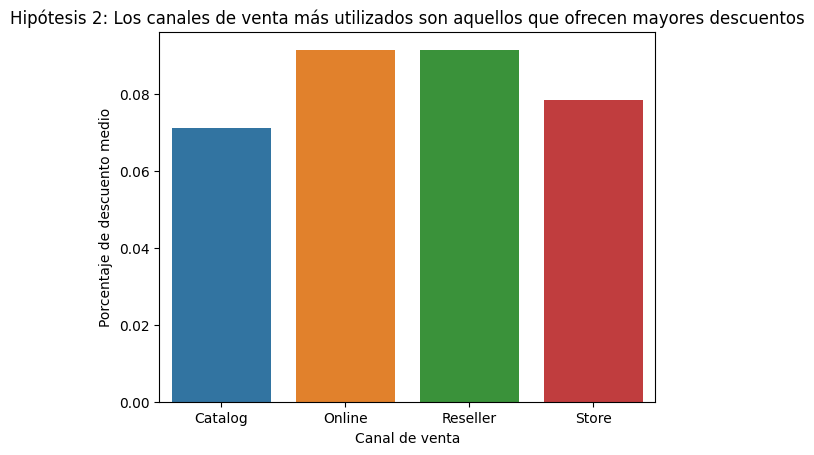

In [146]:
# Crear el DataFrame con los datos necesarios
data = df[['ChannelName', 'DiscountPercent']]

# Calcular el porcentaje de descuento medio para cada canal de venta
mean_discounts = data.groupby('ChannelName').mean()

# Crear la gráfica de barras
sns.barplot(x=mean_discounts.index, y='DiscountPercent', data=mean_discounts)

# Establecer títulos y etiquetas
plt.title('Hipótesis 2: Los canales de venta más utilizados son aquellos que ofrecen mayores descuentos')
plt.xlabel('Canal de venta')
plt.ylabel('Porcentaje de descuento medio')
plt.show()

La hipótesis se **cumple en** **parte**, ya que aunque el canal "Catálogo" tiene el mayor volumen de ventas, no es el que tiene mayores descuentos. En cambio, el canal "Online" tiene mayores descuentos y se encuentra en la segunda posición en términos de ventas. Por otro lado, el canal "Reseller" tiene el mismo porcentaje de descuentos que "Online", pero se encuentra en la tercera posición en términos de ventas.

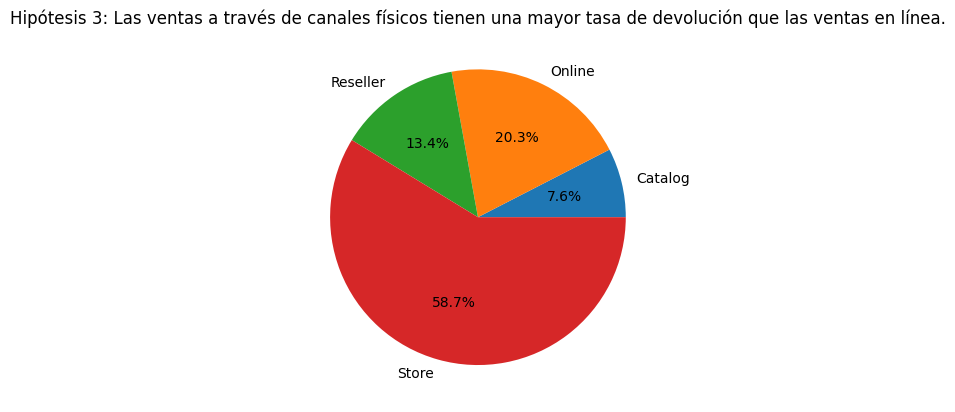

In [147]:
# Crear el DataFrame con los datos necesarios
data = fact_sales.groupby('ChannelName').agg({'ReturnQuantity': 'sum'})

# Crear la gráfica de sectores
plt.pie(data['ReturnQuantity'], labels=data.index, autopct='%1.1f%%')
plt.title('Hipótesis 3: Las ventas a través de canales físicos tienen una mayor tasa de devolución que las ventas en línea.')
plt.show()

La hipótesis es **verdader**a, los canales fisicos en este caso Store tiene la mayor tasa de devolución de todos los canales.

# Grupo 2: Productos

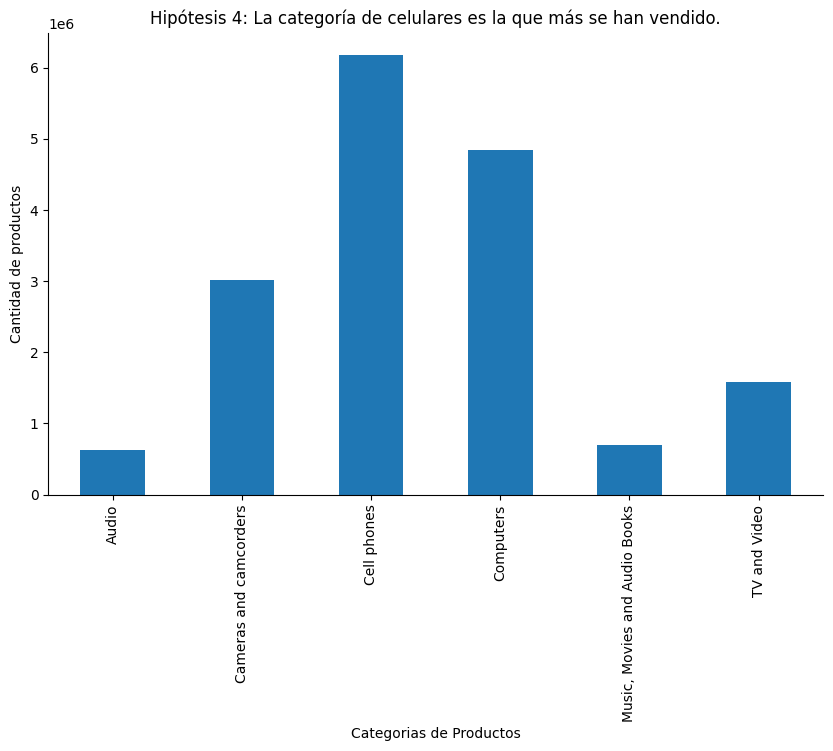

In [150]:
# Agrupar los datos por categoría de producto y sumar las cantidades vendidas
grouped = fact_sales.groupby('ProductCategory')['SalesQuantity'].sum()

# Crear la figura y el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)

# Añadir un título y ajustar los bordes
ax.set_title('Hipótesis 4: La categoría de celulares es la que más se han vendido.')
ax.set_ylabel('Cantidad de productos')
ax.set_xlabel('Categorias de Productos')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

La hipótesis es **verdadera**, la categoría que más se ha vendido es la de celulares.

<ipython-input-154-f294e02443b6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=45, ha='right')


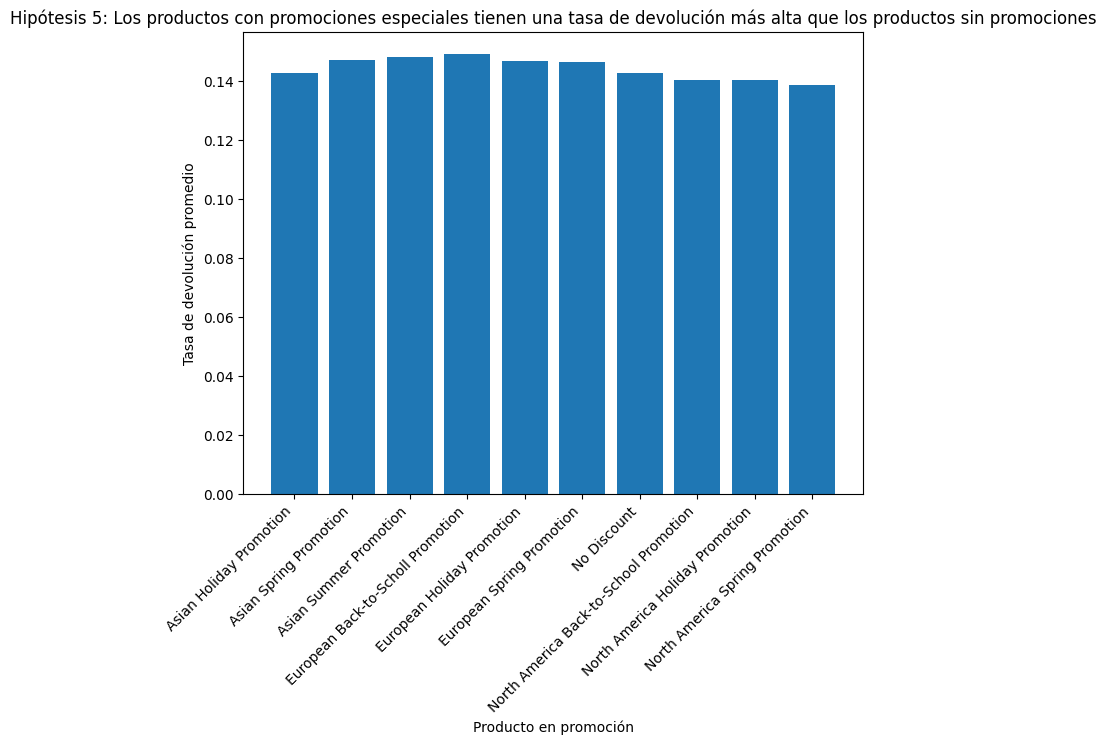

In [154]:
# Crear la figura y el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped.index, grouped.values)

# Rotar las etiquetas del eje x
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Producto en promoción')
ax.set_ylabel('Tasa de devolución promedio')
ax.set_title('Hipótesis 5: Los productos con promociones especiales tienen una tasa de devolución más alta que los productos sin promociones')
plt.show()

La hipotesis es **verdadera**, las devoluciones son mas altas cuando hay promociones especiales.

<ipython-input-160-fe1be1ccdc1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_computers['DateKey'] = pd.to_datetime(df_computers['DateKey'])


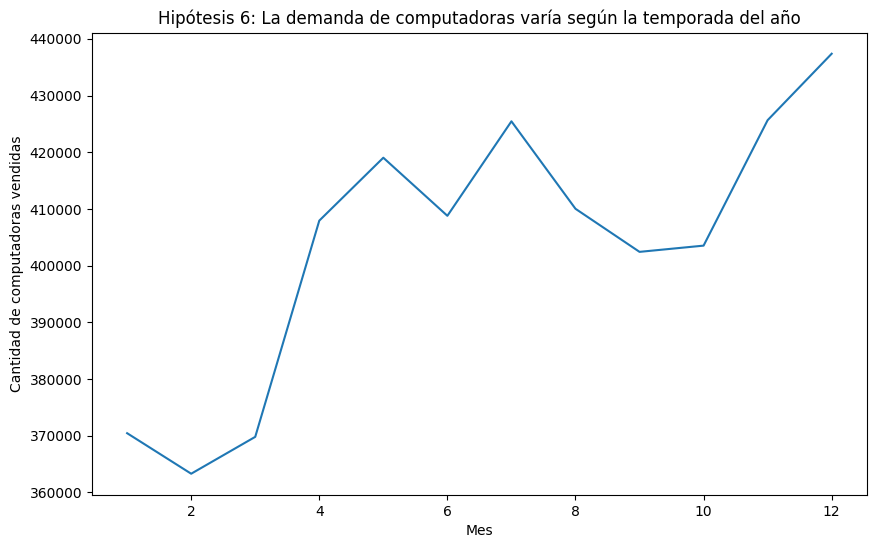

In [160]:
# Convertir la columna DateKey en un objeto datetime
df_computers['DateKey'] = pd.to_datetime(df_computers['DateKey'])

# Agrupar los datos por mes y sumar las cantidades vendidas
grouped = df_computers.groupby(df_computers['DateKey'].dt.month)['SalesQuantity'].sum()

# Crear la figura y el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(grouped.index, grouped.values)

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de computadoras vendidas')
ax.set_title('Hipótesis 6: La demanda de computadoras varía según la temporada del año')
plt.show()

La hipótesis es **correcta**, la demanda de computadoras no es fija, fluctua mes a mes, siendo los ultimos 2 meses del año la temporada de mayores ventas.

# Grupo 3: Promociones

In [163]:
#Creamos la variable de duracion de la promocion
fact_sales['StartDate'] = pd.to_datetime(fact_sales['StartDate'])
fact_sales['EndDate'] = pd.to_datetime(fact_sales['EndDate'])
fact_sales['PromotionDuration'] = fact_sales['EndDate'] - fact_sales['StartDate']

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/04/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/09/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [166]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
fact_sales['DiscountFlag'] = (fact_sales['PromotionName'] != 'No Discount').astype(int)

Text(0, 0.5, 'Ventas generadas')

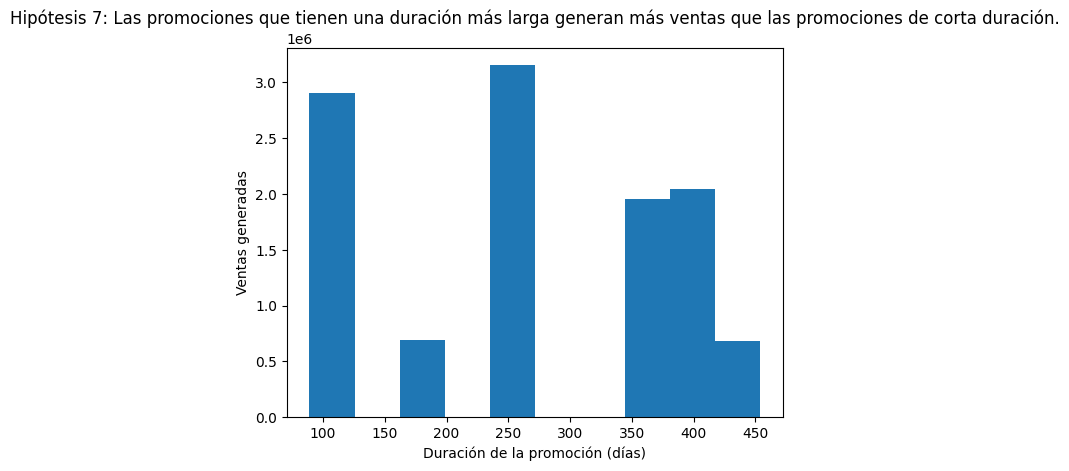

In [177]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Crear un histograma para visualizar la relación entre la duración de las promociones y las ventas generadas
plt.hist(fact_sales_promotions['PromotionDuration'].dt.days, bins=10, weights=fact_sales_promotions['SalesQuantity'])

# Añadir un título y etiquetas a los ejes
plt.title('Hipótesis 7: Las promociones que tienen una duración más larga generan más ventas que las promociones de corta duración.')
plt.xlabel('Duración de la promoción (días)')
plt.ylabel('Ventas generadas')
plt.show()

  Esta hipótesis es **falsa**, ya que el la promocion que duro 250 dias fue la que genero el mayor numero de ventas, y no es la promoción que duro más dias.

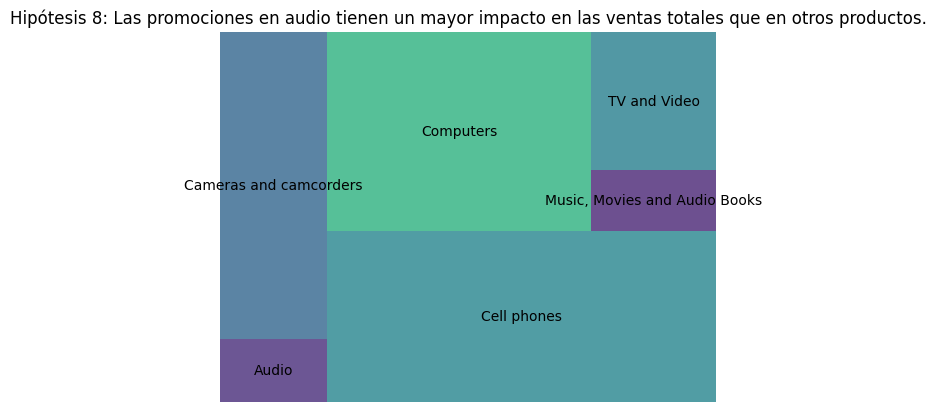

In [186]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Agregar una columna con la suma de las ventas para cada categoría
fact_sales_promotions_sum = fact_sales_promotions.groupby(['ProductCategory']).sum().reset_index()

# Crear el treemap
squarify.plot(sizes=fact_sales_promotions_sum['SalesQuantity'], label=fact_sales_promotions_sum['ProductCategory'], alpha=.8 )
plt.axis('off')
plt.title('Hipótesis 8: Las promociones en audio tienen un mayor impacto en las ventas totales que en otros productos.')
plt.show()

Esta hipótesis es **falsa**, la categoria de audio es la que se vende menos en temporadas de promociones.

In [197]:
fact_sales['DateKey'] = pd.to_datetime(fact_sales['DateKey'], format="%d/%m/%Y")

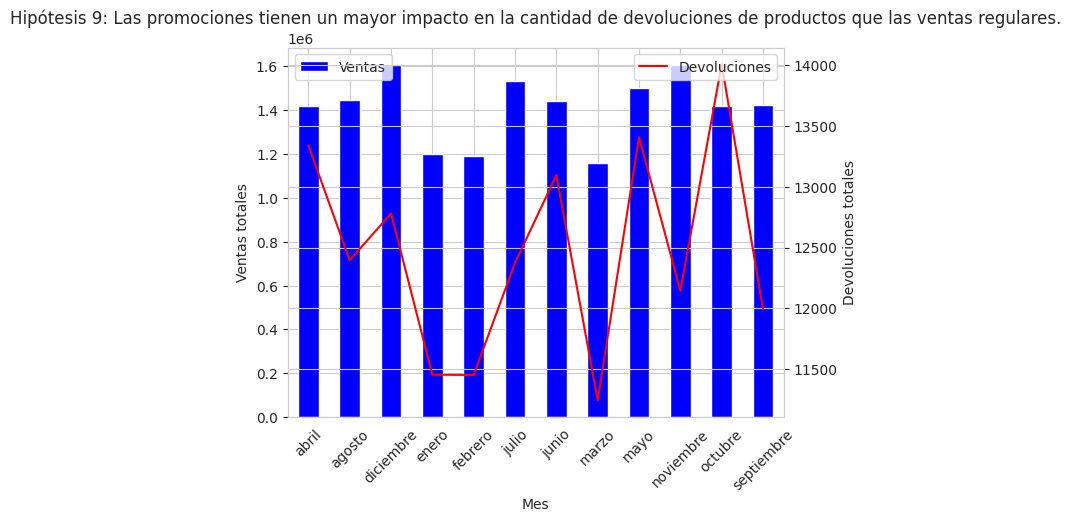

In [205]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Crear segundo eje
ax2 = ax1.twinx()

# Graficar ventas en barras en el primer eje
sales_by_month.plot(kind='bar', y='SalesQuantity', ax=ax1, color='blue')

# Graficar retornos en línea en el segundo eje
sales_by_month.plot(kind='line', y='TotalReturns', ax=ax2, color='red')

# Configurar los ejes
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas totales')
ax2.set_ylabel('Devoluciones totales')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Ventas'], loc='upper left')
ax2.legend(['Devoluciones'], loc='upper right')
plt.title('Hipótesis 9: Las promociones tienen un mayor impacto en la cantidad de devoluciones de productos que las ventas regulares.')
plt.show()

La hipótesis es **falsa,** ya que las ventas siguen siendo mayores que las devoluciones.

# Resumen Ejecutivo

En general, los resultados indican que las hipótesis planteadas en el análisis tienen una mezcla de verdades y falsedades. 

En cuanto a los canales de venta, la venta por catálogo tiene el mayor volumen de ventas, pero no tiene los mayores descuentos, siendo el canal online el que ofrece los mayores descuentos y el tercero en términos de ventas. Los canales físicos, en particular la tienda, tienen una tasa de devolución mayor que los canales en línea. En cuanto a las categorías de productos, la categoría de celulares es la que más se vende.

Por otro lado, las promociones especiales tienen una tasa de devolución más alta que los productos sin promociones, lo cual sugiere que es necesario realizar una evaluación cuidadosa de las promociones antes de implementarlas. La demanda de computadoras varía según la temporada del año, con los últimos dos meses del año siendo la temporada de mayores ventas. Además, se encontró que la promoción que tuvo una duración de 250 días generó el mayor número de ventas, lo que sugiere que la duración de las promociones no necesariamente se correlaciona con el aumento de ventas. Finalmente, se encontró que la categoría de audio tiene un impacto menor en las ventas durante las temporadas de promoción.

En resumen, estos hallazgos pueden ser útiles para mejorar la estrategia de ventas de la empresa, enfocándose en los canales en línea, reduciendo la tasa de devolución de productos promocionales, adaptando la oferta de productos a la temporada del año, y considerando la duración de las promociones y su impacto en las ventas.